In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([3., 4.], requires_grad=True)
q = a**2 + b**3
q.mean().backward()
print(a.grad*2)
print(b.grad*2)

tensor([4., 6.])
tensor([27., 48.])


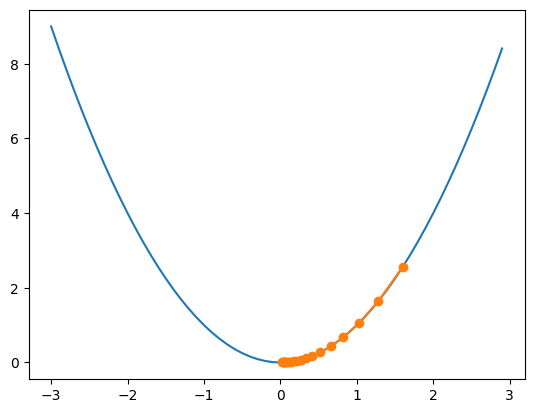

In [5]:
x = torch.tensor([2.], requires_grad=True)
learning_rate = 0.1
data = []

for i in range(20):
    y = x**2
    x.grad = None
    y.backward()
    x.data -= learning_rate * x.grad
    data.append(x.item())

x_grid = np.arange(-3, 3, 0.1)
y_grid = x_grid**2
data = np.array(data)
plt.plot(x_grid, y_grid)
plt.plot(data, data**2, marker='o')

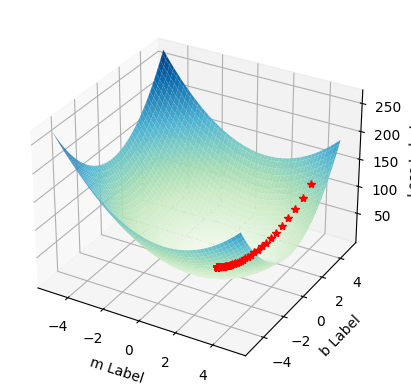

(tensor(0.4140), tensor(-2.3200))

In [140]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def graph_linear_regression_mse(
    x,
    y,
    m_sclae=10,
    b_scale=10,
    sample_density=500,
):
    def normalization(a):
        return (a-torch.mean(a))/torch.std(a)
    
    def mse(x,y,m,b):
        return torch.sum((y-(m*x+b))**2)

    std_x = torch.std(x)
    std_y = torch.std(y)
    mean_y = torch.mean(y)
    mean_x = torch.mean(x)

    x = normalization(x)
    y = normalization(y)

    w = torch.tensor([4., 4.], requires_grad=True)
    learning_rate = 0.01
    data1 = []
    data2 = []
    data3 = []
    iter = 1000
    for _ in range(iter):
        data1.append(w[0].item())
        data2.append(w[1].item())
        data3.append(mse(x,y,w[0],w[1]))
        w.grad = None
        L = mse(x,y,w[0],w[1])
        L.backward()
        w.data -= learning_rate * w.grad

    data1, data2, data3 = torch.Tensor(data1), torch.Tensor(data2), torch.Tensor(data3)
    m_axis = torch.linspace(-5, 5, 100)
    b_axis = torch.linspace(-5, 5, 100)
    m_axis, b_axis = torch.meshgrid(m_axis, b_axis)
    L_axis = []
    for i in range(len(m_axis)):
        tmp = []
        for j in range(len(b_axis)):
            tmp.append(mse(x, y, m_axis[i][j], b_axis[i][j]))
        L_axis.append(tmp)
    L_axis = torch.Tensor(L_axis)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(m_axis, b_axis, L_axis, cmap=plt.get_cmap("GnBu"))

    for i in range(len(data1)):
        ax.plot(data1[i], data2[i], data3[i], c='r', marker="*",zorder=10)
    ax.set_xlabel('m Label')
    ax.set_ylabel('b Label')
    ax.set_zlabel('Loss Label')
    plt.show()

    return w[0].item()/std_x*std_y, mean_y-w[0].item()/std_x*mean_x*std_y
    # m, b

d = torch.tensor([[20, 6.5], [25, 7.7], [30, 9.2], [35, 12.8], [40, 14.3]])
graph_linear_regression_mse(d[:,:1], d[:,1:])

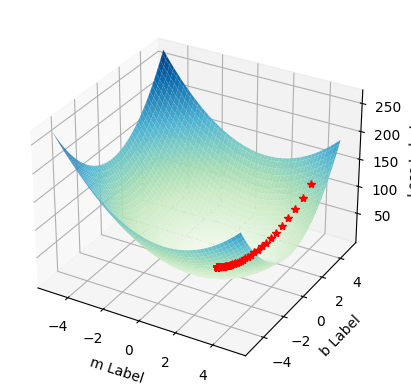

tensor(0.4140) tensor(-2.3200)


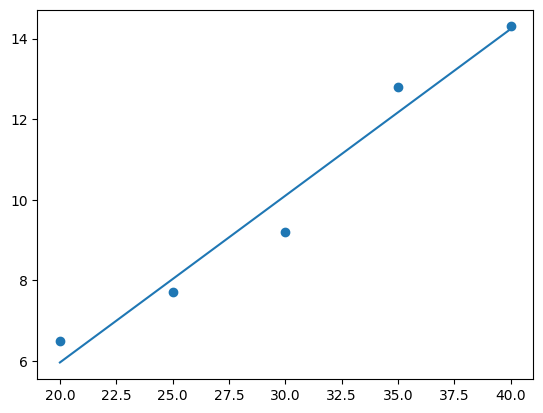

In [141]:
d = torch.tensor([[20, 6.5], [25, 7.7], [30, 9.2], [35, 12.8], [40, 14.3]], requires_grad=True)
m, b = graph_linear_regression_mse(d[:,:1], d[:,1:])

x_line = torch.linspace(20, 40, 10)
y_line = x_line * m + b

plt.scatter(d[:,:1], d[:,1:])
plt.plot(x_line, y_line)
print(m, b)

# 0.54, 3.84


In [167]:
class LinearModel:
    def initialize_params(self):
        self.m = torch.tensor(0.0, requires_grad=True)
        self.b = torch.tensor(0.0, requires_grad=True)

    def __init__(self, m=None, b=None):
        self.initialize_params()
        if m is not None:
            self.m = m
        if b is not None:
            self.b = b

    def __call__(self, x):
        return self.m * x + self.b
    
    @property
    def parameters(self):
        return (self.m, self.b)
    
    def loss(self, x, y):
        return torch.sum((y-(self.m*x+self.b))**2)
    
    def gradient_step(self, tensors, learning_rate):
        print(tensors[0].item(), tensors[1].item())
        for t in tensors:
            t.data -= learning_rate * t.grad

In [173]:
model = LinearModel()
num_epochs = 10000
learning_rate = 1E-6
x = torch.tensor([20., 25., 30., 35., 40.], requires_grad=True)
y = torch.tensor([6.5, 7.7, 9.2, 12.8, 14.3], requires_grad=True)

for n in range(num_epochs):
    y_pred = model(x)
    loss = model.loss(y_pred, x)
    loss.backward()
    model.gradient_step(model.parameters, learning_rate)
    
print(model.m, model.b)
# 단순 모델화로, 표준화는 진행하지 않음

0.0 0.0
0.0 0.00029999998514540493
8.999909084650426e-08 0.0008999969577416778
4.5169906570663443e-07 0.0017999850679188967
1.3619439869216876e-06 0.0029999553225934505
3.1979598134057596e-06 0.004499895963817835
6.44449482933851e-06 0.006299792788922787
1.1702992196660489e-05 0.008399628102779388
1.9702969439094886e-05 0.01079938281327486
3.1315823434852064e-05 0.013499035499989986
4.7571316827088594e-05 0.016498561948537827
6.96770366630517e-05 0.01979793794453144
9.904125181492418e-05 0.023397138342261314
0.00013729953207075596 0.02729613333940506
0.00018634564185049385 0.03149489685893059
0.000248367345193401 0.03599340096116066
0.00032588772592134774 0.04079161956906319
0.0004218128160573542 0.04588952660560608
0.0005394865293055773 0.051287099719047546
0.0006827536853961647 0.056984324008226395
0.000856032595038414 0.06298118084669113
0.0010643983259797096 0.06927766650915146
0.001313678571023047 0.07587377727031708
0.0016105632530525327 0.08276952058076859
0.001962730661034584 0